# The DATA

We are given data of Framingham heart disease study. This study will predict the risk of a patient having ten year coronary heart diease (CHD) using a logistic regression model.

From the data below the columns represent the following: 

- Male: 1 indicating male, 0 indicating female.
- age: The age of the patient.
- education: Level of education.
- currentSmoker: 1 indicating patient smokes, 0 indictaing otherwise.
- cigsPerDay: The number of cigarettes the patient smokes pery day.
- BPMeds: Wheather the patient is on blood pressure medication.
- prevalentStroke: 1 indicating patient has had a recent stroke, 0 otherwise. 
- prevalentHyp: 1 indicating the patient was hypertensive, 0 otherwise.
- diabetes: 1 indicating the patient has diabetes, 0 otherwise.
- totChol: The total cholesterol of the patient.
- sysBP: The systolic blood pressure of the patient.
- diaBP: The diastolic blood pressure of the patient.
- BMI: The body mass index.
- heartRate: The heart rate of the patient. 
- glucose: The glucose levels of the patient.
- tenYearCHD: 1 indicating patient was diagnosed with ten year CHD, 0 otherwise. 
    

In [1]:
#importing the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
heart = pd.read_csv("framingham.csv")

In [3]:
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Here you can see there are 16 columns followed by 4238 entries. Based on this, some of the columns have null values
associated with them such as "education" with only 4133 entries, or "cigsPerDay" with only 4209 entries. We can check 
the missing values in more detail below. 

In [5]:
print(heart.isnull().any())
print("\n")
print(heart.isnull().sum())

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


Let us also create a figure of the missing null values by using a heatmap.

<AxesSubplot:>

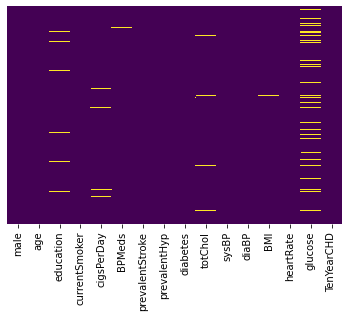

In [6]:
sns.heatmap(heart.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Very little data is missing from the "education", "cigsPerDay", "totChol", "BpMeds" sections. We can drop these individual values later but let us perfrom some exploratory data analysis and vizualizations of the data.

# Exploratory Data Analysis/Vizualizations


There are many factors that can increse the chance of 10 year CHD. Some of these attributes can be:

Demographic: Age, sex or education.

Beahavioural: currentSmoker, cigsPerDay.

Medical History: diabetes, prevalentStroke, prevalentHyp, BPMeds.

Medical Conditions: totChol, heartRate, BMI, glucose, sysBP, diaBP.


Let us look at many of these factors and how they correlate with our target of "TenYearCHD". First I am going to check how man people were diagnosed with ten year CHD and the differences between the males and females.

Text(0.5, 1.0, 'TenYearCHD Count')

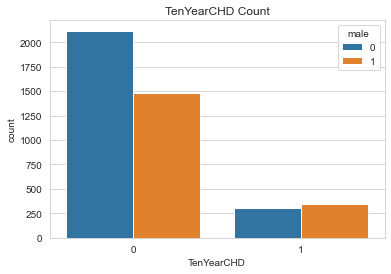

In [20]:
sns.set_style('whitegrid')
sns.countplot(x = 'TenYearCHD', data = heart, hue ='male')
plt.title("TenYearCHD Count")

The data here suggests that majority of the patients did not have a risk of developing heart disease after 10 years. However, an interesting concept is that out of the ones that had a risk, the males were slightly higher than the females. 
Let us now look at the glucose and total cholesterol levels and compare them with the TenYearCHD.

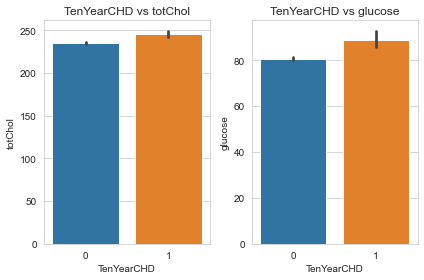

In [27]:
fig, ax =plt.subplots(1,2)
sns.barplot(x = 'TenYearCHD', y ='totChol', data = heart, ax=ax[0]).set_title('TenYearCHD vs totChol')
sns.barplot(x = 'TenYearCHD', y ='glucose', data = heart, ax=ax[1]).set_title('TenYearCHD vs glucose')
plt.tight_layout()

As expected, the patients who had a risk of developing ten year CHD had slightly higher cholesterol and glucose levels than those that did not.

Systolic and diastolic blood pressure are also important factors that can affect the risk of developing ten year CHD. I will now view the relationship between both of these and see how they correlate with our target "TenYearCHD" data.

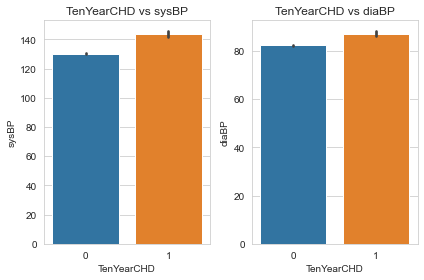

In [26]:
fig, ax =plt.subplots(1,2)
sns.barplot(x = 'TenYearCHD', y ='sysBP', data = heart, ax=ax[0]).set_title('TenYearCHD vs sysBP')
sns.barplot(x = 'TenYearCHD', y ='diaBP', data = heart, ax=ax[1]).set_title('TenYearCHD vs diaBP')
plt.tight_layout()

A higher sysBP and diaBP is known to increase the risk of having heart disease and strokes. As expected, both sysBP and diaBP appear to be higher on patients that had a risk of developing Ten Year CHD than those that didn't.

Next, let us look at how how BPMeds (blood pressure medication) affects the TenYearCHD risk.

Text(0.5, 1.0, 'TenYearCHD vs BPMeds')

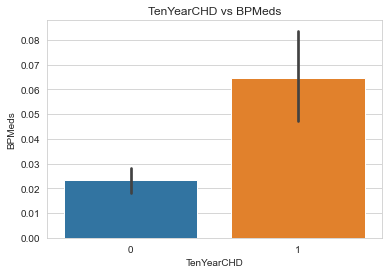

In [24]:
sns.set_style('whitegrid')
sns.barplot(x = 'TenYearCHD', y = 'BPMeds', data = heart).set_title('TenYearCHD vs BPMeds')

The graph shows a higher dosage of blood pressure medication is correlated to the patients who had a risk of developing Ten Year CHD.

Next, let us test an interesting concept. If a patient had a previous stroke, let us see the correlation with how many cigarettes per day the patient smoked. 

Text(0.5, 1.0, 'TenYearCHD vs CigsPerDay')

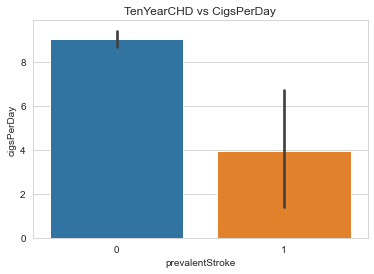

In [12]:
sns.set_style('whitegrid')
sns.barplot(x = 'prevalentStroke', y = 'cigsPerDay', data = heart).set_title('TenYearCHD vs CigsPerDay')

As expected, if a patient has not had a previous stroke, they are smoking on average more than double the amount of ciagrettes. This result indicates the data is accurate beacause doctors always advise patients with illnesses to avoid smoking. 

Let us now look at the categorical data such as "diabetes", "currentSmoker", "prevalentStroke" compared to the target data of TenYearCHD. I will first compare each of these values with age and see any correlation.

<Figure size 1152x432 with 0 Axes>

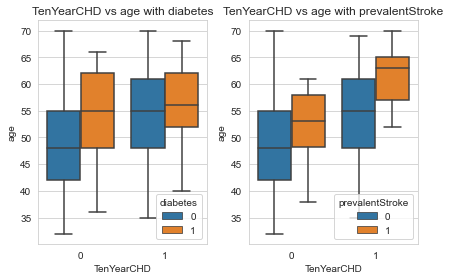

In [13]:
plt.figure(figsize=(16, 6))
fig, ax = plt.subplots(1,2)

#setting up the first plot and adding the legend in bottom right
sns.boxplot(x = 'TenYearCHD', y = 'age', data = heart, hue= 'diabetes', ax=ax[0]).set_title("TenYearCHD vs age with diabetes")
ax[0].legend(loc = 'lower right', title ='diabetes')

#setting up the second plot and adding the legend in bottom right
sns.boxplot(x = 'TenYearCHD', y = 'age', data = heart, hue= 'prevalentStroke', ax=ax[1]).set_title("TenYearCHD vs age with prevalentStroke")
ax[1].legend(loc = 'lower right', title ='prevalentStroke')

plt.tight_layout()

In the first figure, on average the patients with diabetes were older for those who had a risk of developing TenYearCHD and for those who didn't. In the second figure a similar correlation can be seen; the patients who had a prevalent stroke were older for those who had a risk of developing TenYearCHD and for those who didn't.


Text(0.5, 1.0, 'TenYear CHD vs age on currentSmoker')

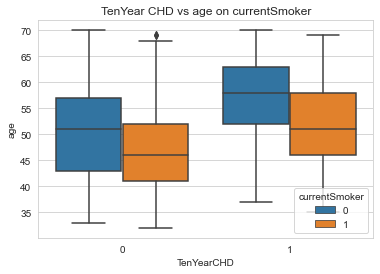

In [28]:
sns.set_style('whitegrid')
sns.boxplot(x = 'TenYearCHD', y = 'age', data = heart, hue= 'currentSmoker')
plt.legend(loc = 'lower right', title ='currentSmoker')
plt.title("TenYear CHD vs age on currentSmoker")

In this figure, the patients who are current smokers were younger for those who had a risk of developing TenYearCHD and for those who weren't. This means there are alot of young smokers in the data we were given that are smoking ciagarettes.

Let us now compare each categorical value ( "diabetes", "currentSmoker", "prevalentStroke") with the systolic blood pressure against the TenYearCHD.

<Figure size 1152x432 with 0 Axes>

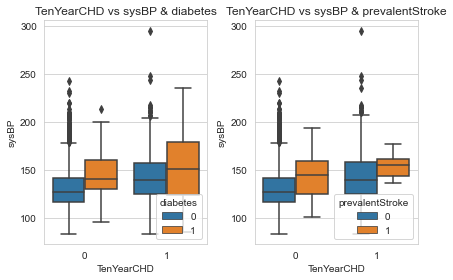

In [129]:
plt.figure(figsize=(16, 6))
fig, ax = plt.subplots(1,2)

#setting up the first plot and adding the legend in bottom right
sns.boxplot(x = 'TenYearCHD', y = 'sysBP', data = heart, hue= 'diabetes', ax=ax[0]).set_title("TenYearCHD vs sysBP & diabetes")
ax[0].legend(loc = 'lower right', title ='diabetes')

#setting up the second plot and adding the legend in bottom right
sns.boxplot(x = 'TenYearCHD', y = 'sysBP', data = heart, hue= 'prevalentStroke', ax=ax[1]).set_title("TenYearCHD vs sysBP & prevalentStroke")
ax[1].legend(loc = 'lower right', title ='prevalentStroke')

plt.tight_layout()

As mentioned earlier in the report, a higher sysBP is known to increase the risk of having a heart disease and strokes. In the first figure, we can see the patients with diabetes had a higher systolic blood pressure for those who had a risk of developing TenYearCHD and for those who didn't. We can see the same correlation in the second figure; patients with a previous stroke had a higher systolic blood pressure for those who had a risk of developing TenYearCHD and for those who didn't. 

Text(0.5, 1.0, 'TenYear CHD vs sysBP on currentSmoker')

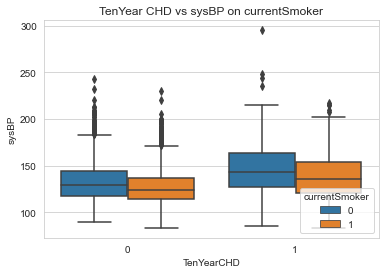

In [30]:
sns.set_style('whitegrid')
sns.boxplot(x = 'TenYearCHD', y = 'sysBP', data = heart, hue= 'currentSmoker')
plt.legend(loc = 'lower right', title ='currentSmoker')
plt.title("TenYear CHD vs sysBP on currentSmoker")

In this final figure, on average a patient who was a current smoker had a lower systolic blood pressure for those who had a risk of developing TenYearCHD and for those who didn't. This data may be a little skewed because in theory a patient who smokes will usually have a higher systolic blood pressure than a patient who doesn't. However, this can be a paradox because some studies have shown that the systolic blood pressure can actually be slightly lower for regular smokers than non smokers which is what we see here. 

Now that we have gathered information about our data, let us begin the data processing and cleaning stage before testing the data. 

 # Data Processing/Cleaning 

I am now going to check which features have the most correlation with one another and to the target variable of "TenYearCHD" using a heatmap.

<AxesSubplot:>

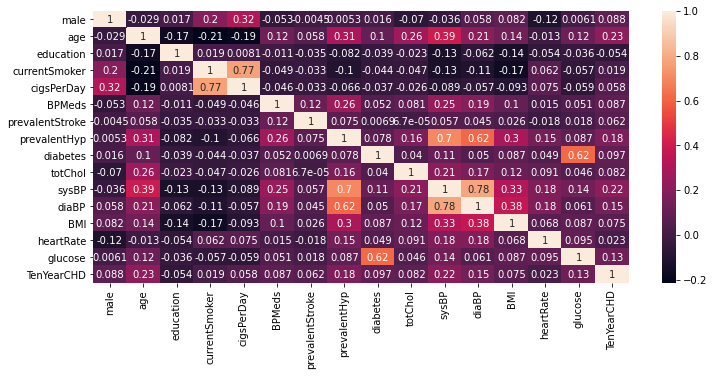

In [7]:
plt.figure(figsize = (12,5))
sns.heatmap(heart.corr(),annot=True)

Based on the above chart, a value closer to 1 shows a direct correlation between the variables on each axis. As a result, the "education" variable has the most non zero values and very few values that are even above zero. Not only this, but if we compare the numbers of all the other variables to our target of  "TenYearCHD", we realize that "Education" has the only negative value of -0.054 and has very little correlation. We can therefore chose to drop this column because it has little importance on our target data. 

In [8]:
heart.drop('education', axis = 1, inplace = True)

Let us now remove all the null values that we saw at the top of this project since they will not be much use to our overall testing model. I will check again the columns that had null values. 

In [9]:
heart.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
heart = heart.dropna()
print(heart.isnull().sum())
print('\n')
print(heart.info())

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP 

We have successfully dropped all the entries with missing values in them and can see that our entries have gone down from 4238 to 3749. 

Let us now find the baseline accuracy of the data so we can see what accuracy our model needs to have in order to be considered effective. It is important to note that a baseline accuracy will usually act on the majority group which in many diagnostic cases are the patients who tested negative or do not have the condition. 

In [11]:
#checking the number of entries of TenYearCHD  
heart["TenYearCHD"].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [12]:
#baseline accuracy

baseline = 3177/ (3177 + 572)
baseline

0.847425980261403

We can now start the logistic regression model and see if we can achieve an accuracy of 0.85 or above.


# Building a Logistic Regression Model

Let's start by splitting our data into a training set and testing set.

## Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

We will be setting the X variable (all the columns except the target TenYearCHD) and the y variable (the target TenYearCHD) for the train test split data.

In [14]:
X = heart.drop('TenYearCHD',axis=1)
y = heart['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

## Training Model and Predictions

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix,accuracy_score

In [19]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

In [17]:
predictions = log_model.predict(X_test)

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.62      0.06      0.11       174

    accuracy                           0.85      1125
   macro avg       0.74      0.53      0.51      1125
weighted avg       0.82      0.85      0.79      1125



[[945   6]
 [164  10]]


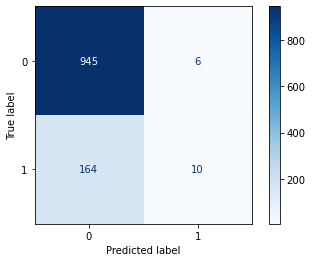

In [23]:
print(confusion_matrix(y_test, predictions))
print(plot_confusion_matrix(log_model, X_test, y_test, cmap=plt.cm.Blues))

In [24]:
accuracy_score(y_test,predictions)

0.8488888888888889

As we can see, the accuracy score we got from the logistic regression model of evalauting the data is 0.85 which is around the baseline accuracy, so the model is adequately effective. However, if we evaluate this result, the model does a great job at predicting 84.9% of patients that do not have the disease. If we wanted to see how many positive cases of TenYearCHD risk were successfully predicted, we need to look at the recall score. Recall is important because in medical studies, false negatives need to be minimized (telling a patient who has the disease they don't.)

As shown in the classification report, the recall score of predicting the risk of TenYearCHD is just 6% and can be calculated by "true positive/ true positive + false negative". In the confusion matrix, the TP is the bottom right square, the TN is the top left square, the FP is the top right square and the FN is the bottom left square. As a result, the model does not do an effective job at predicting patients who have a risk of TenYearCHD (6%), but does an effective job at predicting patients who don't (84.9%).

To conclude, the reason for the 6% recall is due to the data being highly unbalanced where more than 80% of the patients did not have a risk of developing TenYearCHD. As a result, a way to overcome this would be to try oversampling and undersampling and use a decision tree classifier instead. 